# Chapter 6: Confidence Intervals

### Section 6.2: Confidence Intervals for the Mean ($\sigma$ Unkown)
##### Objective 1: Interreting the $t$-distribution and using a $t$-distribution table
##### Objective 2:  Constructing and Interpreting Confidence Intervals for a Population Mean when $\sigma$ (Population Standard Deviation) is Not Known

##### Objective 1: Interreting the $t$-distribution and using a $t$-distribution table

##### $t$-Distribution

* The <em><b>$t$-distribution</b></em> is a family of curves, each determined by a parameter called the <em>degrees of freedom</em>

    * The <em><b>degrees of freedom (d.f.)</b></em> are the number of free choices left after a sample statistic such as $\bar{x}$ is calculated
    
    * When you use a $t$-distribution to estimate a population mean, the degrees of freedom are given by $d.f. = n-1$

    * As the degrees of freedom increase, the $t$-distribution approaches the standard normal distribution

    * If $d.f. \geq 30$, the $t$-distribution is approximately equal to the standard normal distribution

##### Properties of the $t$-distribution:

* The mean, median, and mode of the $t$-distribution are equal to 0.
* The $t$-distribution is bell-shaped and symmetric about the mean.
* The total area under the $t$-distribution is 1.
* The tails in the $t$-distribution are "thicker" than those in the standard normal distribution.
* The standard deviation of the $t$-distribution varies with the sample size, but it is always greater than 1.

Visualizing the $t$-distribution:

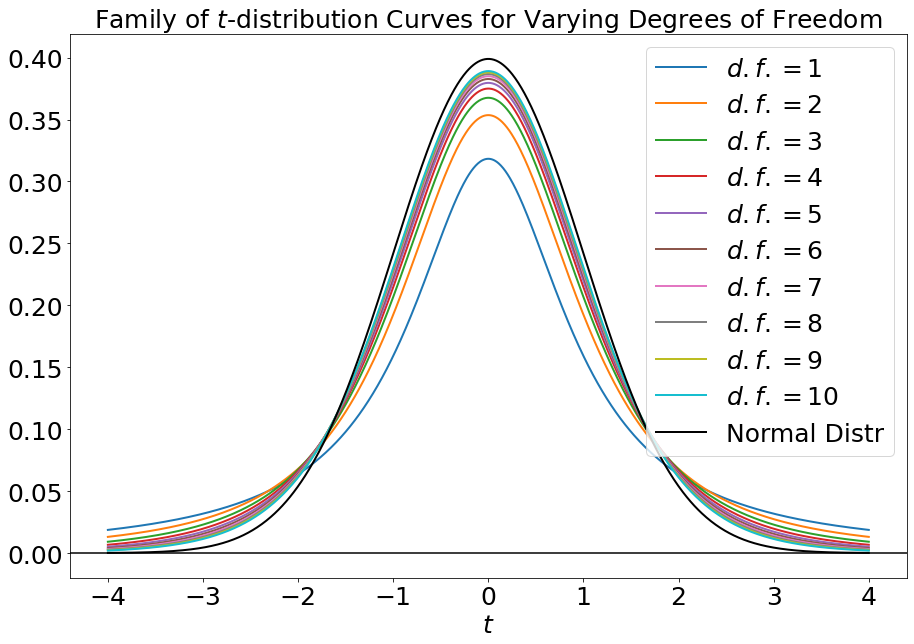

In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats

%matplotlib inline

xmin = -4
xmax  = 4
df = np.arange(1,11,1)
single_df = 10

x = np.linspace(xmin,xmax,1000)

fig, ax = plt.subplots(figsize=(15,10))
ax.axhline(y=0,color='k')
ax.set_xlabel('$t$',fontsize=25)
ax.tick_params(labelsize=25)
ax.set_title('Family of $t$-distribution Curves for Varying Degrees of Freedom',fontsize=25)
for i in df:
    ax.plot(x,t.pdf(x,i),label='$d.f. = {}$'.format(i),lw=2) ##### FAMILY OF T-DISTR CURVES
#    ax.fill_between(x,t.pdf(x,i),alpha=.5)
# ax.plot(x,t.pdf(x,single_df),label='$d.f. = {}$'.format(single_df),lw=2) ##### TOGGLE FINE TUNING OF DF
ax.plot(x,stats.norm.pdf(x,0,1),label='Normal Distr',lw=2,color='k') ##### TOGGLE NORMAL DISTRIBUTION
ax.legend(fontsize=25,loc='upper right',markerscale=.5)

##### Example 1

Find the critical value $t_c$ for a $95\%$ confidence level when the sample size is 15.

##### Solution:

First, let's understand this visually:

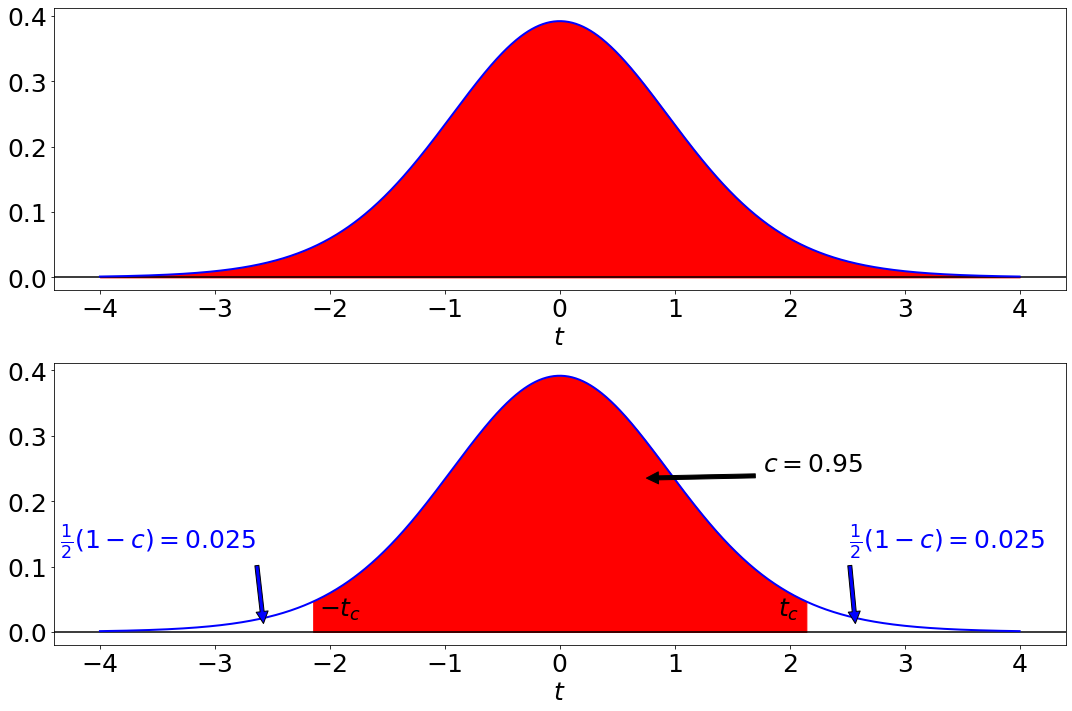

In [2]:
xmin = -4
xmax  = 4
df = 14
t1 = -2.145
t2 = 2.145

x = np.linspace(xmin,xmax,1000)

fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
ax1.axhline(y=0,color='k')
ax1.set_xlabel('$t$',fontsize=25)
ax1.tick_params(labelsize=25)
ax1.plot(x,t.pdf(x,df),label='d.f. = {}'.format(df),lw=2,color='blue') ##### TOGGLE FINE TUNING OF DF
ax1.fill_between(x,0,t.pdf(x,df),color='red')

x_fill_between = np.linspace(t1,t2,1000)
y_fill_between = t.pdf(x_fill_between,df)

ax2.axhline(y=0,color='k')
ax2.set_xlabel('$t$',fontsize=25)
ax2.tick_params(labelsize=25)
ax2.plot(x,t.pdf(x,df),label='d.f. = {}'.format(df),lw=2,color='blue') ##### TOGGLE FINE TUNING OF DF
ax2.fill_between(x_fill_between,0,y_fill_between,color='red') ##### AREA BETWEEN
ax2.annotate('$-t_c$',xy=(t1+.05,0.025),xytext=(t1+0.05,0.025),color='k',fontsize=25)
ax2.annotate('$t_c$',xy=(t2+.05,0.025),xytext=(t2-.25,0.025),color='k',fontsize=25)
ax2.annotate('$c=0.95$',
            xy=(.7, t.pdf(0,df)-.4*t.pdf(0,df)),
            xytext=(.8, 0.6),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='k',
           fontsize=25)
ax2.annotate(r'$\frac{1}{2}(1-c) = 0.025$',
            xy=(1.2*t1, t.pdf(0,df)-.98*t.pdf(0,df)),
            xytext=(.2, 0.3),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
           fontsize=25)
ax2.annotate(r'$\frac{1}{2}(1-c) = 0.025$',
            xy=(1.2*t2, t.pdf(0,df)-.98*t.pdf(0,df)),
            xytext=(.98, 0.3),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
           fontsize=25)

fig.tight_layout()

* We know that $c = 0.95$ and $n = 15$.

* This means that $d.f. = n - 1 = 15 - 1 = 14$.

* We can use this information to find the appropriate $t_c$ from the table by doing the following:

* We need to compute $1 - c = 1 - 0.95 = 0.05$. For <em>confidence intervals</em> involving a $t$-distribution we will always look for the column under <em>"Area in Two Tails"</em> that has the value computed.

* The row is always determined by the d.f. which in this case is 14.

    * If the degrees of freedom is not listed in the table, then round <em>down</em> to the nearest d.f. that is in the table, unless the d.f. are well above 1000.
    
    * Then just use the $\infty$ or the standard normal table (since the $t$-distribution approximates the standard normal distribution as $d.f. \rightarrow \infty$).

* Therefore, we have $t_c = 2.145$

##### Objective 2:  Constructing and Interpreting Confidence Intervals for a Population Mean when $\sigma$ (Population Standard Deviation) is Not Known

##### Constructing a Confidence Interval for a Population Mean ($\sigma$ Unknown):

1. Verify that $\sigma$ (population standard deviation) is <em>not</em> known, the sample is random, and either the population is normally distributed or $n \geq 30$.

2. Find the sample statistics $n,\bar{x}$, and $s$ (sample standard deviation)

3. Identify the degrees of freedom, the level of confidence $c$, and the critical value $t_c$

4. Find the margin of error $E = t_c \cdot \frac{s}{\sqrt{n}}$ (differs from when $\sigma$ is known!)

5. Find the left and right endpoints and form the confidence interval:

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E \\
\text{Right endpoint: } && \bar{x} + E \\
\text{Interval: } && \bar{x} - E < \mu < \bar{x} + E
\end{eqnarray}

##### Example 2

You randomly select 16 coffee shops and measure the temperature of the coffee sold at each. The sample mean temperature is $162.0^{\circ}$F with a sample standard deviation of $10.0^{\circ}$F. Construct a $95\%$ confidence interval for the population mean temperature of coffee sold. Assume the temperatures are approximately normally distributed.

##### Solution:

Step-by-step solution:

1. The problem states the <em>sample</em> standard deviation ($s$) but makes no mention of the <em>population</em> standard deviation ($\sigma$). We are also given the assumption that the temperatures are approximately normally distributed, so the size of our random samples is irrelevant. If we were not given that information, samples of size 16 would not be sufficient to proceed.

2. Finding necessary sample statistics: $n=16$, $\bar{x} = 162.0$, and $s = 10.0$.

3. Degrees of freedom is given by $d.f. = n-1 = 16 - 1 = 15$. With this information we know that $c = 0.95 \Rightarrow t_c = 2.131$.

4. Calculating the margin of error:

$$
    E = t_c \cdot \frac{s}{\sqrt{n}} = 2.131 \cdot \frac{10.0}{\sqrt{16}} \approx 5.3
$$

5. Find the left and right endpoints and form the confidence interval:

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E = 162.0 - 5.3 \approx 156.7 \\
\text{Right endpoint: } && \bar{x} + E = 162.0 + 5.3 \approx 167.3 \\
\text{Interval: } && \boxed{156.7 < \mu < 167.3} \text{ or } \boxed{(156.7,167.3)}
\end{eqnarray}

Interpretation: we can say with $95\%$ confidence the popluation mean temperature of coffee sold is between $156.7^{\circ}$F and $167.3^{\circ}$F.

##### Example 3

You randomly select 36 cars of the same model that were sold at a car dealership and determine the number of days each car sat on the dealership's lot before it was sold. The sample mean is 9.75 days, with a sample standard deviation of 2.39 days. Construct a $99\%$ confidence interval for the population mean number of days the car model sits on the dealership's lot.

##### Solution:

Step-by-step solution:

1. We are randomly selecting $n = 36 \geq 30$ cars (Central Limit Theorem applies). We are told that the <em>sample</em> standard deviation is $s = 2.39$ days. We are not given any information about the population standard deviation ($\sigma$ is unkown) .

2. we know that $n = 36$, $\bar{x} = 9.75$ days, and $s = 2.39$.

3. We know $d.f. = n - 1 = 35$, $c=0.99$, and $t_c = 2.724$.

4. Find the margin of error $E = t_c \cdot \frac{s}{\sqrt{n}} = 2.724 \cdot \frac{2.39}{\sqrt{36}} \approx 1.09$.

5. Find the left and right endpoints and form the confidence interval.

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E = 9.75 - 1.09 = 8.66 \\
\text{Right endpoint: } && \bar{x} + E = 9.75 + 1.09 = 10.84 \\
\text{Interval: } && \boxed{8.66 < \mu < 10.84} \text{ or } \boxed{(8.66,10.84)}
\end{eqnarray}

Interpretation: we can say with $99\%$ confidence the popluation mean number of days each car sat on the dealership's lot before it was sold is between 8.66 days and 10.84 days.

##### Example 4

You randomly select 25 newly constructed houses. The sample mean construction cost is $\$181,000$ and the population standard deviation is $\$28,000$. Assuming construction costs are normally distributed, should you use the standard normal distribution, the $t$-distribution, or neither to construct a $95\%$ confidence interval for the population mean construction cost? If either the standard normal distribution or the $t$-distribution can be used, construct the interval.

##### Solution:

Step-by-step solution:

1. We are <em>randomly</em> selecting $n = 25$ houses, but we are given that the construction costs are normally distributed (Central Limit Theorem applies). We are given that the <em>population</em> standard deviation is $\sigma = 28000$. Since we know what the <em>population</em> standard deviation is we know $\sigma$, not $s$ (the sample standard deviation is irrelevant here). What is the significance of knowing $\sigma$?

    * We don't need to use the $t$-distribution when $\sigma$ is known! So we can proceed in using the standard normal distribution (use $z_c$, not $t_c$).

2. We know that $\bar{x} = 181000$ and $n = 25$.

3. The level of confidence is $c = 0.95 \Rightarrow z_c = 1.96$.

4. Calculating the margin of error $E = z_c \cdot \frac{\sigma}{\sqrt{n}} = 1.96 \cdot \frac{28000}{\sqrt{25}} = 10976$.

5. Find the left and right endpoints and form the confidence interval.

\begin{eqnarray}
\text{Left endpoint: } && \bar{x} - E = 181000 - 10976 = 170024 \\
\text{Right endpoint: } && \bar{x} + E = 181000 + 10976 = 191976 \\
\text{Interval: } && \boxed{170024 < \mu < 191976} \text{ or } \boxed{(170024,191976)}
\end{eqnarray}

Interpretation: we can say with $95\%$ confidence that the true mean of newly constructed houses costs is between $\$170,024$ and $\$191,976$.

##### End of Section